# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Big Data Real-Time Analytics com Python e Spark</font>

<br><br>

# <font color='black'><center>Mini-Projeto 2</center></font>

### <font color='black'>Processo de Construção, Treinamento, Avaliação e Seleção de Modelos Para Regressão</font>

<br>

### Etapas:

- Construção, Treinamento, Avaliação e Seleção de Modelos para <u>Regressão</u>

<br>

### Introdução:

- Vamos trabalhar agora em nosso segundo Mini-Projeto de Machine Learning, cujo objetivo é trazer para você um passo a passo completo do processo de construção, treinamento, avaliação e seleção de **modelos para regressão**. Todo o processo será demonstrado de uma ponta a outra, desde a definição do problema de negócio, até a interpretação do modelo e entrega do resultado ao tomador de decisão.

<br>

### Contexto:

- Uma **empresa de e-commerce** comercializa produtos através de seu **web site** e de sua **app** para dispositivos móveis. Para efetuar uma compra, um cliente realiza um cadastro no portal (usando web site ou app). Cada vez que o cliente realiza o login, o sistema registra o tempo que fica logado, seja na app ou no web site.
- Para cada cliente, a empresa mantém o registro de vendas com o total gasto por mês.
- A empresa gostaria de **aumentar as vendas**, mas o orçamento permite investir somente no web site ou na app neste momento. O foco é melhorar a experiência do cliente durante a navegação no sistema, aumentando o tempo logado, aumentando o engajamento e, consequentemente, aumentando as vendas.

<br>

### Sobre os Dados:

<br>

<table border="2">
  <tr>
    <th style="text-align: center; font-size: 16px;">Nome da Coluna</th>
    <th style="text-align: center; font-size: 16px;">Tipo de Dado</th>
    <th style="text-align: center; font-size: 16px;">Descrição</th>
  </tr>
  <tr>
    <td>tempo_cadastro_cliente</td>
    <td>float64</td>
    <td>Tempo que o cliente está cadastrado, convertido de meses para anos.</td>
  </tr>
  <tr>
    <td>numero_medio_cliques_por_sessao</td>
    <td>float64</td>
    <td>Número médio de cliques (ou toques) em cada sessão.</td>
  </tr>
  <tr>
    <td>tempo_total_logado_app</td>
    <td>float64</td>
    <td>Tempo total logado na app em minutos.</td>
  </tr>
  <tr>
    <td>tempo_total_logado_website</td>
    <td>float64</td>
    <td>Tempo total logado no web site em minutos.</td>
  </tr>
  <tr>
    <td>valor_total_gasto</td>
    <td>float64</td>
    <td>Valor total gasto pelo cliente em um mês em R$.</td>
  </tr>
</table>





<br>

### Objetivo:

- O **objetivo** deste projeto é ajudar a empresa a tomar uma decisão sobre **onde investir (web site ou app)** para melhorar a experiência do cliente, aumentando o tempo logado e, assim, o engajamento e as vendas.
- Vamos **construir**, **treinar**, **avaliar** e **selecionar modelos de regressão** para **prever o valor total gasto pelo cliente em um mês**, com base no tempo logado e outras ariáveis.

<br>

### IMPORTANTE:

- Analisando nossos dados, definimos a variável **"valor_total_gasto"** como nossa **variável alvo**.
- Para este projeto, não queremos apenas prever o valor; queremos estudar o **relacionamento entre as variáveis**.
- Isso será uma **entrega adicional** do modelo de Machine Learning.

<br>

- Internamente, os modelos de Machine Learning fazem **relacionamentos entre os dados**. Portanto, é exatamente esse relacionamento que será usado para resolver o problema de negócio. 
- Vamos **criar um modelo** que será capaz de **realizar previsões**. No entanto, nosso foco não será as previsões, mas sim o **relacionamento que o modelo encontrou durante seu aprendizado**.
- Esta é uma **característica/propriedade** dos modelos de Machine Learning que nos permite **resolver** ainda mais problemas de negócio.

<br><br><br>
## Importando Pacotes

In [1]:
### Manipulação de Dados ###

# NumPy: Biblioteca para operações matemáticas e manipulação de arrays.
import numpy as np
# Pandas: Biblioteca para manipulação e análise de dados estruturados.
import pandas as pd


### Exibição de Gráficos ###

# Matplotlib: Biblioteca para criação de gráficos e visualizações.
import matplotlib.pyplot as plt
# Seaborn: Biblioteca para criação de gráficos estatísticos e visualizações.
import seaborn as sns


### Machine Learning ###

# Scikit-learn: Biblioteca para ML, incluindo ferramentas para pré-processamento, modelagem, e avaliação.
import sklearn
# Train Test Split: Função para dividir os dados em conjuntos de treino e teste.
from sklearn.model_selection import train_test_split
# StandardScaler: Ferramenta para padronização de recursos, ajustando a média e a variância.
from sklearn.preprocessing import StandardScaler
# LinearRegression, Ridge, Lasso: Algoritmos de regressão linear, incluindo regularização L2 (Ridge) e L1 (Lasso).
from sklearn.linear_model import LinearRegression, Ridge, Lasso


### Avaliação de Modelos ### 

# Métricas para avaliar o desempenho
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score


### Configurações Adicionais ###

# Configuração de estilo para visualizações Seaborn.
sns.set_style('whitegrid')
# Inline: Para exibir gráficos diretamente no Jupyter Notebook.
%matplotlib inline
# Warnings: Biblioteca para gerenciar mensagens de aviso, aqui usada para ignorar avisos futuros.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<br><br>

## Carregando o Conjunto de dados

In [2]:
# Carrega o dataset
dados = pd.read_csv('dados/dataset.csv')

#### Info

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


- Podemos observão que **NÃO HÁ** valores **outliers**.

<br>

In [4]:
dados.head()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075


<br>

## Análise Exploratória de Dados

#### Nome das Colunas

In [7]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

#### Correlação

In [8]:
# Verificando Correlação (tabela)
dados.corr()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.060247,0.029143,-0.047582,0.809084
numero_medio_cliques_por_sessao,0.060247,1.000000,-0.027826,-0.034987,0.355088
tempo_total_logado_app,0.029143,-0.027826,1.000000,0.082388,0.499328
tempo_total_logado_website,-0.047582,-0.034987,0.082388,1.000000,-0.002641
valor_total_gasto,0.809084,0.355088,0.499328,-0.002641,1.000000


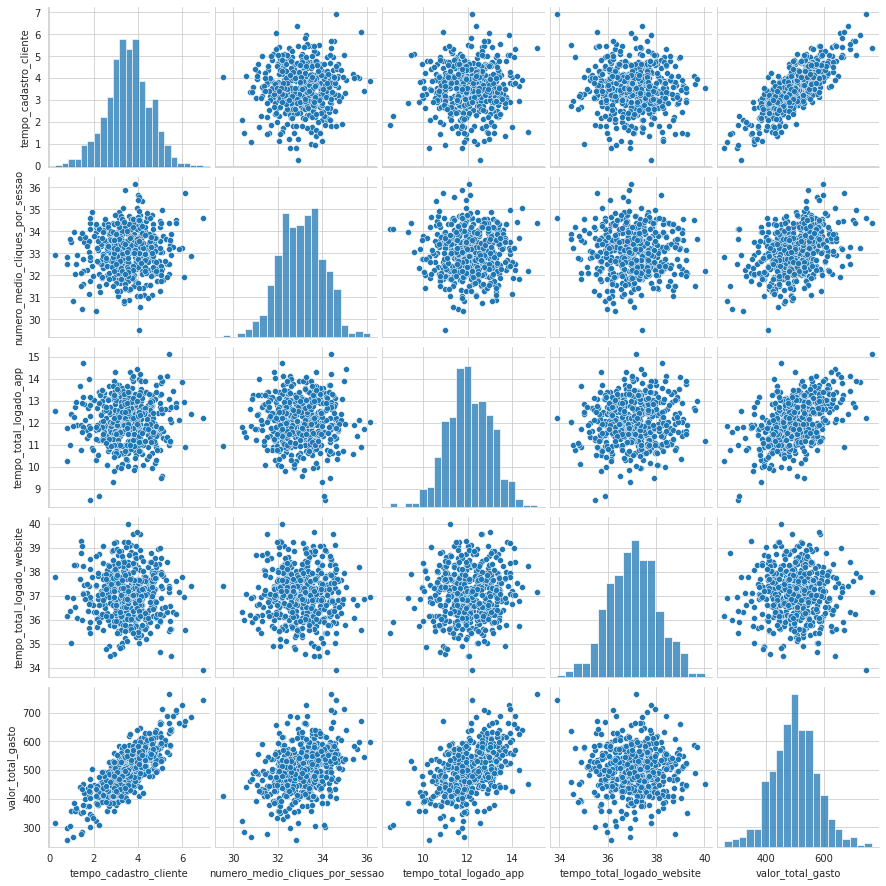

In [9]:
# Correlação (matriz de gráficos de dispersão (scatter plots))
sns.pairplot(dados)

#### Detalhes dos Gráficos:
- **Diagonal**: Cada gráfico na diagonal mostra um **histograma** que representa a distribuição de uma variável específica.
- **Fora da Diagonal**: Cada gráfico fora da digagonal mostra um **gráfico de dispersão** que mostra a relação entre duas variáveis diferentes.

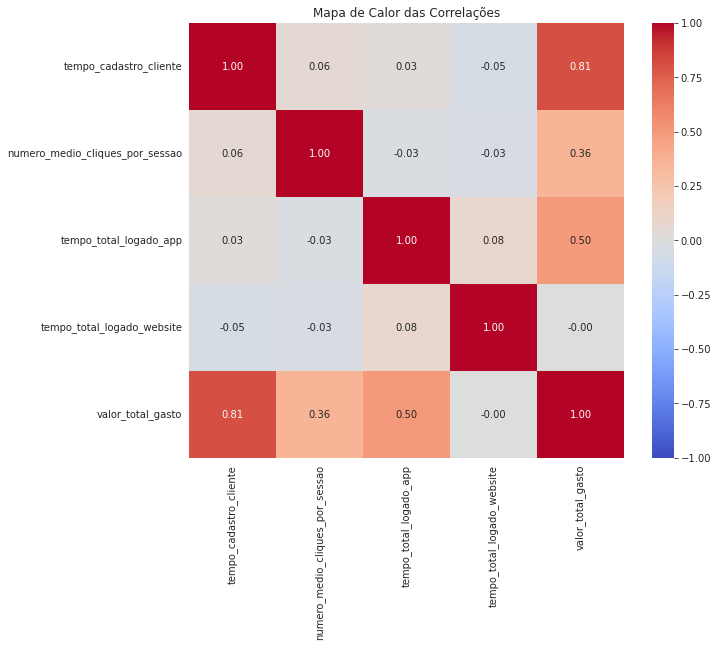

In [11]:
# Visualizando Correlações através de um Mapa de Calor

# Criando o heatmap
corr_matrix = dados.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))  # Define o tamanho da figura
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)
plt.title('Mapa de Calor das Correlações')
plt.show()

<br>

### Análise 1 - Relação Entre Tempo no Web Site e Valor Gasto

<Figure size 1296x864 with 0 Axes>

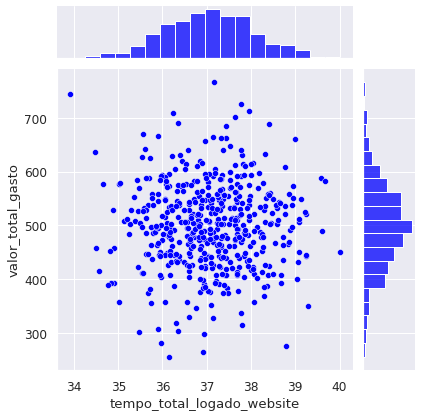

In [12]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados, 
              x = 'tempo_total_logado_website', 
              y = 'valor_total_gasto',
              color = 'blue')

#### Detalhes dos Gráficos:

- Os **histogramas** indicam que ambas as variáveis seguem uma **distribuição normal**.
- O **gráfico de dispersão** sugere que **não há uma correlação** evidente entre **tempo_total_logado_website** e **valor_total_gasto**, pois os pontos estão **espalhados de forma aleatória** e **não seguem uma tendência clara**.
- Vamos confirmar calculando o **coeficiente de correlação** entre elas abaixo.

In [13]:
# Correlação (tabela)
dados[['tempo_total_logado_website', 'valor_total_gasto']].corr()

,tempo_total_logado_website,valor_total_gasto
tempo_total_logado_website,1.000000,-0.002641
valor_total_gasto,-0.002641,1.000000


#### Conclusão:

- **Não parece haver correlação** entre o **tempo logado no web site** e o **valor gasto pelos clientes**.

<br>

<br>

### Análise 2 - Relação Entre Tempo na App e Valor Gasto

#### Detalhes dos Gráficos:

- Os **histogramas** 

#### Conclusão:

- 

<br>

<br>

### Análise 3 - Relação Entre Tempo na App e Tempo de Cadastro

#### Detalhes dos Gráficos:

- Os **histogramas** 

#### Conclusão:

- 

<br>

<br>

### Análise 4 - Relação Entre Tempo de Cadastro e Valor Gasto

#### Detalhes dos Gráficos:

- Os **histogramas** 

#### Conclusão:

- 

<br>

<br>

### Análise 5 - Relação Entre Tempo Logado na App e Tempo Logado no Web Site

#### Detalhes dos Gráficos:

- Os **histogramas** 

#### Conclusão:

- 

<br>

<br><br>

# Pré-Processamento de Dados Para Construção de Modelos de Machine Learning